     symboling fueltype aspiration doornumber      carbody drivewheel  \
0            3      gas        std        two  convertible        rwd   
1            3      gas        std        two  convertible        rwd   
2            1      gas        std        two    hatchback        rwd   
3            2      gas        std       four        sedan        fwd   
4            2      gas        std       four        sedan        4wd   
..         ...      ...        ...        ...          ...        ...   
200         -1      gas        std       four        sedan        rwd   
201         -1      gas      turbo       four        sedan        rwd   
202         -1      gas        std       four        sedan        rwd   
203         -1   diesel      turbo       four        sedan        rwd   
204         -1      gas      turbo       four        sedan        rwd   

    enginelocation  wheelbase  carlength  carwidth  ...  enginesize  \
0            front       88.6      168.8      64.1  

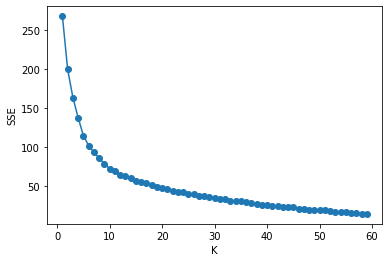

     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88

In [28]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd
import numpy as np


#加载数据
data = pd.read_csv('F:\SVW数据训练营 材料\exam code\Project C\CarPrice_Assignment.csv',encoding='gbk')
train = data.drop(['car_ID','CarName'],axis=1)
print (train)


#LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['fueltype'] = le.fit_transform(train['fueltype'])
train['aspiration'] = le.fit_transform(train['aspiration'])
train['doornumber'] = le.fit_transform(train['doornumber'])
train['carbody'] = le.fit_transform(train['carbody'])
train['drivewheel'] = le.fit_transform(train['drivewheel'])
train['enginelocation'] = le.fit_transform(train['enginelocation'])
train['cylindernumber'] = le.fit_transform(train['cylindernumber'])
train['enginetype'] = le.fit_transform(train['enginetype'])
train['fuelsystem'] = le.fit_transform(train['fuelsystem'])

#print (train)


#规范化到 [0,1] 空间
min_max_scaler = preprocessing.MinMaxScaler()
train_x = min_max_scaler.fit_transform(train)
pd.DataFrame(train_x).to_csv('temp.csv', index=False)
#print (train_x)

# K-Means 手肘法：统计不同K取值的误差平方和
import matplotlib.pyplot as plt
sse = []
for k in range(1, 60):
	# kmeans算法
	kmeans = KMeans(n_clusters=k)
	kmeans.fit(train_x)
	# 计算inertia簇内误差平方和
	sse.append(kmeans.inertia_)
x = range(1, 60)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(x, sse, 'o-')
plt.show()

#使用KMeans聚类,K取8
kmeans = KMeans(n_clusters=8)
kmeans.fit(train_x)
predict_y = kmeans.predict(train_x)
#合并聚类结果，插入到原数据中
result = pd.concat((data,pd.DataFrame(predict_y)),axis=1)
result.rename({0:u'聚类结果'},axis=1,inplace=True)
print(result)
#将结果导出到CSV文件中
#result.to_csv("F:\SVW数据训练营 材料\exam code\Project C\Project C Result.csv",index=False)


#找出所有VW车型对应的竞品车型，这段参考了https://github.com/Pengyu1224/-/blob/master/Project/Project_C.ipynb
#所有VW车型名称
VW=['vokswagen rabbit','volkswagen 1131 deluxe sedan','volkswagen model 111','volkswagen type 3','volkswagen 411 (sw)','volkswagen super beetle','volkswagen dasher','vw dasher','vw rabbit','volkswagen rabbit','volkswagen rabbit custom']
#提取与VW车型相同聚类的所有车型
for vw in VW:
	Group_num = result[result['CarName'].isin([vw])]['聚类结果'].tolist()#提取VW车型对应的聚类结果编号
	Rivals = result.loc[result['聚类结果']==int(Group_num[0])]['CarName']#提取与VW车型相同聚类结果的车型竞品名称
	Rival_list=[]
	for r in Rivals:
		if r != vw:#去除竞品车型列表中与自身车型重复的名称
			Rival_list.append(r)
	Rival_string = ', '.join(Rival_list)#以逗号分隔竞品车型名称列表并转化为字符串
	print(str(vw)+' 的竞争车型有：'+Rival_string+'\n\n')#打印各VW车型对应竞品车型名称